# Boston House Prices

In [229]:
# 필요한 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
%matplotlib inline

In [230]:
train = pd.read_csv('./train.csv')      #1460*81
test = pd.read_csv('./test.csv')        #1459*80

train = train.drop('Id', axis=1)
test = test.drop('Id', axis=1)

train.shape, test.shape

((1460, 80), (1459, 79))

In [231]:
y = train['SalePrice']

y = np.log(y, where=y != 0)

train = train.drop('SalePrice', axis=1)
all_features = pd.concat([train, test], ignore_index=True)

In [232]:
for col in all_features.columns:
    if all_features[col].isna().sum():
        print(f'{col} : {all_features[col].isna().sum()}개')

MSZoning : 4개
LotFrontage : 486개
Alley : 2721개
Utilities : 2개
Exterior1st : 1개
Exterior2nd : 1개
MasVnrType : 24개
MasVnrArea : 23개
BsmtQual : 81개
BsmtCond : 82개
BsmtExposure : 82개
BsmtFinType1 : 79개
BsmtFinSF1 : 1개
BsmtFinType2 : 80개
BsmtFinSF2 : 1개
BsmtUnfSF : 1개
TotalBsmtSF : 1개
Electrical : 1개
BsmtFullBath : 2개
BsmtHalfBath : 2개
KitchenQual : 1개
Functional : 2개
FireplaceQu : 1420개
GarageType : 157개
GarageYrBlt : 159개
GarageFinish : 159개
GarageCars : 1개
GarageArea : 1개
GarageQual : 159개
GarageCond : 159개
PoolQC : 2909개
Fence : 2348개
MiscFeature : 2814개
SaleType : 1개


In [233]:
'''
all_features['Functional'] = all_features['Functional'].fillna('Typ')
all_features['Electrical'] = all_features['Electrical'].fillna("SBrkr")
all_features['KitchenQual'] = all_features['KitchenQual'].fillna("TA")
all_features['Exterior1st'] = all_features['Exterior1st'].fillna(all_features['Exterior1st'].mode()[0])
all_features['Exterior2nd'] = all_features['Exterior2nd'].fillna(all_features['Exterior2nd'].mode()[0])
all_features['SaleType'] = all_features['SaleType'].fillna(all_features['SaleType'].mode()[0])
all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

all_features["PoolQC"] = all_features["PoolQC"].fillna("None")
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_features[col] = all_features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    all_features[col] = all_features[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_features[col] = all_features[col].fillna('None')

for col in all_features.columns:
    if all_features[col].isna().sum():
        print(f'{col} : {all_features[col].isna().sum()}개')
all_features = all_features.drop(['LotFrontage','Alley','FireplaceQu','Fence','MiscFeature'], axis=1)
cnt = 0
for col in all_features.columns:
    if all_features[col].isna().sum():
        all_features[col] = all_features[col].fillna(all_features[col].mode()[0])
    if all_features[col].isna().sum():
        cnt +=1
        print(col)
print(f'null값이 존재하는 컬럼 개수 : {cnt}개')
'''


'\nall_features[\'Functional\'] = all_features[\'Functional\'].fillna(\'Typ\')\nall_features[\'Electrical\'] = all_features[\'Electrical\'].fillna("SBrkr")\nall_features[\'KitchenQual\'] = all_features[\'KitchenQual\'].fillna("TA")\nall_features[\'Exterior1st\'] = all_features[\'Exterior1st\'].fillna(all_features[\'Exterior1st\'].mode()[0])\nall_features[\'Exterior2nd\'] = all_features[\'Exterior2nd\'].fillna(all_features[\'Exterior2nd\'].mode()[0])\nall_features[\'SaleType\'] = all_features[\'SaleType\'].fillna(all_features[\'SaleType\'].mode()[0])\nall_features[\'MSZoning\'] = all_features.groupby(\'MSSubClass\')[\'MSZoning\'].transform(lambda x: x.fillna(x.mode()[0]))\n\nall_features["PoolQC"] = all_features["PoolQC"].fillna("None")\nfor col in (\'GarageYrBlt\', \'GarageArea\', \'GarageCars\'):\n    all_features[col] = all_features[col].fillna(0)\nfor col in [\'GarageType\', \'GarageFinish\', \'GarageQual\', \'GarageCond\']:\n    all_features[col] = all_features[col].fillna(\'None\'

In [234]:
# 범주형 데이터 추출
categorical_features = all_features.select_dtypes(include=['object'])

# 수치형 데이터 추출
numeric_features = all_features.select_dtypes(exclude=['object'])
#numeric_features = numeric_features.apply(lambda x: (x - x.mean()) / (x.std()))
numeric_features = numeric_features.fillna(0)
numeric_features.shape

(2919, 36)

In [235]:
categorical_L = []
categorical_len = []

for col in categorical_features.columns:
    f_dic = {}
    for i,v in enumerate(categorical_features[col].unique()):
        f_dic[v] = i
    em = categorical_features[col].map(f_dic)
    categorical_L.append(em)
    categorical_len.append(len(categorical_features[col].unique()))

categorical_features = np.stack(categorical_L,1)
categorical_features.shape , numeric_features.shape

((2919, 43), (2919, 36))

In [236]:
categorical_features_size = []
for x in categorical_len:
    categorical_features_size.append((x,x//2))
#categorical_features_size

In [237]:
all_features = np.concatenate([categorical_features,numeric_features],1)
X = all_features[:len(y), :]
X_test = all_features[len(y):, :]
X.shape, y.shape, X_test.shape

((1460, 79), (1460,), (1459, 79))

모델

In [238]:
class Model(nn.Module):
    def __init__(self, embedding_size, layers,categorical_size=43,numeric_size=36):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.categorical_size = categorical_size
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        
        self.input_batch = nn.BatchNorm1d(numeric_size)

        all_layers = []
        input_size_t = num_categorical_cols+numeric_size
        for i in layers:
            all_layers.append(nn.Linear(input_size_t, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            input_size_t = i

        self.layers = nn.Sequential(*all_layers)
        self.outlayer = nn.Linear(layers[-1], 1)

    def forward(self, x):
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x[:,i].long()))
        x1 = torch.cat(embeddings, 1)
        x2 = self.input_batch(x[:,self.categorical_size:])
        x = torch.cat((x1,x2),1)
        x = self.layers(x)
        x = self.outlayer(x)
        return x

In [239]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [240]:
from sklearn.model_selection import train_test_split
batch_size = 128
if type(y) == type(pd.Series()):
    y=y.to_numpy()
X_train , X_val , y_train , y_val = train_test_split(X, y,test_size=0.2, shuffle=True,random_state=5252)

y_val = torch.tensor(y_val).float().to(device).unsqueeze(1) # Unsqueeze to match the shape of the output of our model
X_val = torch.tensor(X_val).float().to(device)

y_train = torch.tensor(y_train).float().to(device).unsqueeze(1) # Unsqueeze to match the shape of the output of our model
X_train = torch.tensor(X_train).float().to(device)
dataset = TensorDataset(X_train, y_train) # Make X,y into dataset so we can work with DataLoader which iterate our data in batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

X_test= torch.tensor(X_test).float().to(device)
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape)


torch.Size([1168, 79]) torch.Size([1168, 1])
torch.Size([292, 79]) torch.Size([292, 1])
torch.Size([1459, 79])


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_45956\4027195020.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if type(y) == type(pd.Series()):


In [241]:
sum([b for a,b in categorical_features_size])

127

In [242]:
model = Model(categorical_features_size,[200,200,200,200])
model.to(device)

#optimizer = torch.optim.SGD(model.parameters(), lr=0.002, momentum=0.9, weight_decay=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimizer,
                                        lr_lambda=lambda epoch: 0.94 ** epoch)
criterion = nn.MSELoss() 

In [243]:
train_losses = [] 
val_losses = [] 
epochs = 150

X_val , y_val = X_val.to(device) , y_val.to(device)

for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for batch, (X,y) in enumerate(dataloader):
        X , y = X.to(device) , y.to(device)
        y_pred = model(X) 
        loss = criterion(y_pred, y) 
        running_loss += loss.item()
        
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
    #scheduler.step()
    
    train_losses.append(running_loss/(batch + 1))

    model.eval()
    with torch.no_grad():
        y_pred = model(X_val)
        val_loss = criterion(y_pred, y_val).item()
        val_losses.append(val_loss)
    print(f'{epoch} : {train_losses[-1]:.5f} {val_losses[-1]:.5f}')
    torch.save(model.state_dict(), os.path.join('./model_data/', '{0:0=2d}.pth'.format(epoch)))

0 : 142.71253 219.87517
1 : 140.19740 108.85268
2 : 137.07956 120.93787
3 : 132.23427 104.51118
4 : 125.65879 126.52358
5 : 117.90952 106.73870
6 : 108.17739 105.02385
7 : 97.30465 91.55510
8 : 85.52137 75.78777
9 : 72.91058 64.16919
10 : 60.47629 52.82418
11 : 48.33898 43.13950
12 : 37.20074 30.75408
13 : 27.39985 22.54265
14 : 19.11802 15.92784
15 : 12.67666 9.50314
16 : 7.97736 6.11816
17 : 4.72376 3.32847
18 : 2.56780 1.53282
19 : 1.28971 0.81329
20 : 0.66161 0.38167
21 : 0.30701 0.24522
22 : 0.17564 0.18377
23 : 0.10549 0.10739
24 : 0.08666 0.11548
25 : 0.09863 0.08449
26 : 0.06593 0.14086
27 : 0.07360 0.07777
28 : 0.05912 0.06987
29 : 0.05773 0.08696
30 : 0.05843 0.06351
31 : 0.05170 0.06870
32 : 0.06452 0.07005
33 : 0.05833 0.05746
34 : 0.05011 0.06918
35 : 0.03557 0.05625
36 : 0.04128 0.06657
37 : 0.04024 0.07257
38 : 0.04528 0.08145
39 : 0.03878 0.05775
40 : 0.03169 0.05893
41 : 0.04464 0.07314
42 : 0.04466 0.05718
43 : 0.03711 0.06617
44 : 0.04755 0.06308
45 : 0.03893 0.05197

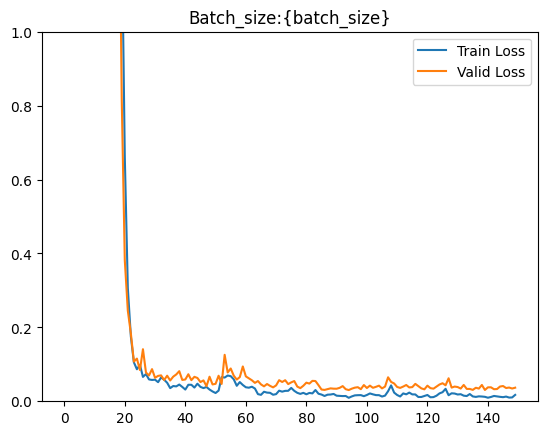

In [244]:
sns.lineplot(train_losses[:], label='Train Loss')
sns.lineplot(val_losses[:], label='Valid Loss')
plt.ylim(0, 1.0)
plt.title('Batch_size:{batch_size}')
plt.legend()
plt.show()

In [245]:
# test
best_epoch = np.argmin(np.array(val_losses)) + 1
print(f'최적의 epoch는 {best_epoch} loss:{val_losses[best_epoch-1]:.5f}')
model.load_state_dict(torch.load(os.path.join('./model_data/', '{0:0=2d}.pth'.format(best_epoch-1))))
model.eval()
output = model(X_test)
output.shape

최적의 epoch는 95 loss:0.03032


torch.Size([1459, 1])

In [246]:
output = torch.exp(output)
output = output.cpu().detach().numpy()

In [247]:
sub = pd.read_csv('./sample_submission.csv')
sub['SalePrice'] = output

In [248]:
sub.to_csv('answer13.csv', index=False)